<a href="https://colab.research.google.com/github/keweiang/AISanomalydetection/blob/main/CleanAISdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#use graduate.utm.my account

Mounted at /content/drive


Read every .txt in AIS data folder, give each column the attribute name and select those rows in October only, appended the .txt files

In [ ]:
import pandas as pd
import numpy as np
import glob

all_data = pd.DataFrame()
for f in glob.glob("/content/drive/MyDrive/ShipMove/*.txt"):
    df = pd.read_csv(f, delimiter = ";",header=None, names = ['Date Time','Message ID', 'MMSI Number','Navigation Status','Rate of Turn','Speed Over Ground','Position Accuracy','Longitude','Latitude','Course Over Ground','Heading Angle','Timestamp','Channel of AIS','Repeat Indicator'])
    df=df[(df['Date Time']>= '2019-10-01') & (df['Date Time']<= '2019-10-04')]    #filter October 1 to October 4 data only -> 4 days data
    all_data = all_data.append(df,ignore_index=True)

Drop those less important features that cannot contribute to determine abnomalies, select those important features into AISdata.csv

In [ ]:
from google.colab import files
all_data.drop(['Message ID', 'Navigation Status','Position Accuracy','Repeat Indicator'], inplace=True, axis = 1)
all_data

,Date Time,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp,Channel of AIS
0,2019-10-01 03:57:29.643849,566241000,0,0.0,103.782597,1.274448,18.8,126,29,A
1,2019-10-01 04:09:28.716233,566241000,0,0.0,103.782650,1.274480,18.8,126,29,A
2,2019-10-01 04:15:28.319625,566241000,0,0.0,103.782645,1.274455,18.8,126,29,A
3,2019-10-01 04:34:07.182831,566241000,0,0.0,103.782647,1.274438,18.8,126,9,A
4,2019-10-01 04:36:07.206859,566241000,0,0.0,103.782602,1.274432,18.8,126,9,A
...,...,...,...,...,...,...,...,...,...,...
968771,2019-10-02 23:17:00.199384,248437000,251,0.0,103.872045,1.267475,96.3,29,0,A
968772,2019-10-03 01:34:59.761764,248437000,5,0.0,103.872008,1.267585,290.6,25,0,A
968773,2019-10-03 04:10:59.369565,248437000,251,0.0,103.872055,1.267527,340.1,31,59,A
968774,2019-10-03 04:52:58.641309,248437000,251,0.0,103.872040,1.267527,302.4,29,59,A


In [ ]:
MMSI=all_data['MMSI Number'].unique()
print(MMSI)

from numpy import savetxt
savetxt('MMSI.csv', MMSI, delimiter='\n')

[566241000 566218000 566282000 ... 563027900 248402000 248437000]


In [ ]:
# remove duplicates
all_data.drop_duplicates()

,Date Time,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp,Channel of AIS
0,2019-10-01 03:57:29.643849,566241000,0,0.0,103.782597,1.274448,18.8,126,29,A
1,2019-10-01 04:09:28.716233,566241000,0,0.0,103.782650,1.274480,18.8,126,29,A
2,2019-10-01 04:15:28.319625,566241000,0,0.0,103.782645,1.274455,18.8,126,29,A
3,2019-10-01 04:34:07.182831,566241000,0,0.0,103.782647,1.274438,18.8,126,9,A
4,2019-10-01 04:36:07.206859,566241000,0,0.0,103.782602,1.274432,18.8,126,9,A
...,...,...,...,...,...,...,...,...,...,...
968771,2019-10-02 23:17:00.199384,248437000,251,0.0,103.872045,1.267475,96.3,29,0,A
968772,2019-10-03 01:34:59.761764,248437000,5,0.0,103.872008,1.267585,290.6,25,0,A
968773,2019-10-03 04:10:59.369565,248437000,251,0.0,103.872055,1.267527,340.1,31,59,A
968774,2019-10-03 04:52:58.641309,248437000,251,0.0,103.872040,1.267527,302.4,29,59,A


In [ ]:
# filter data within Straits of Malacca and Singapore only
all_data=all_data[(((all_data['Longitude']>=103.4525)&(all_data['Longitude']<=104.3689))&((all_data['Latitude']>=1.1354)&(all_data['Latitude']<=1.6443)))|(((all_data['Longitude']>=98.025)&(all_data['Longitude']<=103.5121))&((all_data['Latitude']>=1.2107)&(all_data['Latitude']<=6.535)))]    
all_data


,Date Time,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp,Channel of AIS
0,2019-10-01 03:57:29.643849,566241000,0,0.0,103.782597,1.274448,18.8,126,29,A
1,2019-10-01 04:09:28.716233,566241000,0,0.0,103.782650,1.274480,18.8,126,29,A
2,2019-10-01 04:15:28.319625,566241000,0,0.0,103.782645,1.274455,18.8,126,29,A
3,2019-10-01 04:34:07.182831,566241000,0,0.0,103.782647,1.274438,18.8,126,9,A
4,2019-10-01 04:36:07.206859,566241000,0,0.0,103.782602,1.274432,18.8,126,9,A
...,...,...,...,...,...,...,...,...,...,...
968771,2019-10-02 23:17:00.199384,248437000,251,0.0,103.872045,1.267475,96.3,29,0,A
968772,2019-10-03 01:34:59.761764,248437000,5,0.0,103.872008,1.267585,290.6,25,0,A
968773,2019-10-03 04:10:59.369565,248437000,251,0.0,103.872055,1.267527,340.1,31,59,A
968774,2019-10-03 04:52:58.641309,248437000,251,0.0,103.872040,1.267527,302.4,29,59,A


In [ ]:
all_data.info()
all_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932568 entries, 0 to 968775
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date Time           932568 non-null  object 
 1   MMSI Number         932568 non-null  int64  
 2   Rate of Turn        932568 non-null  int64  
 3   Speed Over Ground   932568 non-null  float64
 4   Longitude           932568 non-null  float64
 5   Latitude            932568 non-null  float64
 6   Course Over Ground  932568 non-null  float64
 7   Heading Angle       932568 non-null  int64  
 8   Timestamp           932568 non-null  int64  
 9   Channel of AIS      932568 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 78.3+ MB


(932568, 10)

In [ ]:
#filter speed (in knots)
all_data=all_data[(all_data['Speed Over Ground']<=216)]
all_data

,Date Time,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp,Channel of AIS
0,2019-10-01 03:57:29.643849,566241000,0,0.0,103.782597,1.274448,18.8,126,29,A
1,2019-10-01 04:09:28.716233,566241000,0,0.0,103.782650,1.274480,18.8,126,29,A
2,2019-10-01 04:15:28.319625,566241000,0,0.0,103.782645,1.274455,18.8,126,29,A
3,2019-10-01 04:34:07.182831,566241000,0,0.0,103.782647,1.274438,18.8,126,9,A
4,2019-10-01 04:36:07.206859,566241000,0,0.0,103.782602,1.274432,18.8,126,9,A
...,...,...,...,...,...,...,...,...,...,...
968771,2019-10-02 23:17:00.199384,248437000,251,0.0,103.872045,1.267475,96.3,29,0,A
968772,2019-10-03 01:34:59.761764,248437000,5,0.0,103.872008,1.267585,290.6,25,0,A
968773,2019-10-03 04:10:59.369565,248437000,251,0.0,103.872055,1.267527,340.1,31,59,A
968774,2019-10-03 04:52:58.641309,248437000,251,0.0,103.872040,1.267527,302.4,29,59,A


In [ ]:
all_data.to_csv("AISdata.csv")
files.download("AISdata.csv")  
all_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Date Time,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp,Channel of AIS
0,2019-10-01 03:57:29.643849,566241000,0,0.0,103.782597,1.274448,18.8,126,29,A
1,2019-10-01 04:09:28.716233,566241000,0,0.0,103.782650,1.274480,18.8,126,29,A
2,2019-10-01 04:15:28.319625,566241000,0,0.0,103.782645,1.274455,18.8,126,29,A
3,2019-10-01 04:34:07.182831,566241000,0,0.0,103.782647,1.274438,18.8,126,9,A
4,2019-10-01 04:36:07.206859,566241000,0,0.0,103.782602,1.274432,18.8,126,9,A
...,...,...,...,...,...,...,...,...,...,...
968771,2019-10-02 23:17:00.199384,248437000,251,0.0,103.872045,1.267475,96.3,29,0,A
968772,2019-10-03 01:34:59.761764,248437000,5,0.0,103.872008,1.267585,290.6,25,0,A
968773,2019-10-03 04:10:59.369565,248437000,251,0.0,103.872055,1.267527,340.1,31,59,A
968774,2019-10-03 04:52:58.641309,248437000,251,0.0,103.872040,1.267527,302.4,29,59,A


In [ ]:
# check whether missing values in these columns
print(all_data.isnull().sum())

Date Time             0
MMSI Number           0
Rate of Turn          0
Speed Over Ground     0
Longitude             0
Latitude              0
Course Over Ground    0
Heading Angle         0
Timestamp             0
Channel of AIS        0
dtype: int64


In [ ]:
all_data=all_data.dropna()    # Dropping missing values if exist
all_data.count()

Date Time             932568
MMSI Number           932568
Rate of Turn          932568
Speed Over Ground     932568
Longitude             932568
Latitude              932568
Course Over Ground    932568
Heading Angle         932568
Timestamp             932568
Channel of AIS        932568
dtype: int64

In [ ]:
all_data.describe()

,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp
count,9.325680e+05,932568.000000,932568.000000,932568.000000,932568.000000,932568.000000,932568.000000,932568.000000
mean,5.175471e+08,60.774755,3.751550,103.696310,1.274181,201.128712,286.698587,31.435207
std,9.645587e+07,71.590645,7.723895,0.171912,0.069325,112.539917,171.890420,17.947043
min,2.000000e+08,-1.000000,0.000000,102.350725,1.135400,0.000000,0.000000,0.000000
25%,5.252003e+08,0.000000,0.000000,103.617845,1.227398,104.700000,128.000000,16.000000
50%,5.630292e+08,0.000000,0.100000,103.712135,1.273203,221.900000,270.000000,32.000000
75%,5.647500e+08,128.000000,6.300000,103.767090,1.304867,297.900000,511.000000,47.000000
max,7.777778e+08,255.000000,102.300000,104.368880,1.847172,360.000000,511.000000,63.000000


In [ ]:
#Rate of turn (+-127) [-128 = not available]
# SOG (0-102.2) [102.3 = not available]
# COG (0-3599) [3600 = not available]
# Heading Angle (0-359) [511 = not available/default]
# Timestamp (0-59) [60 = not available/default ; 62 = electronic position fixing system operates in estimated mode ; 61 = manual input mode ; 63 = inoperative positioning system ]

Detect Outliers

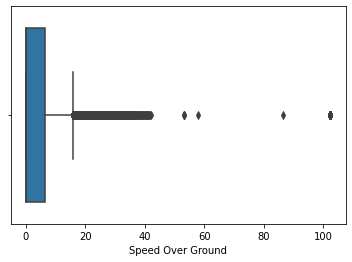

In [ ]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

sns.boxplot(x=all_data['Speed Over Ground'])

In [ ]:
all_data['Speed Over Ground'].describe()

count    932568.000000
mean          3.751550
std           7.723895
min           0.000000
25%           0.000000
50%           0.100000
75%           6.300000
max         102.300000
Name: Speed Over Ground, dtype: float64

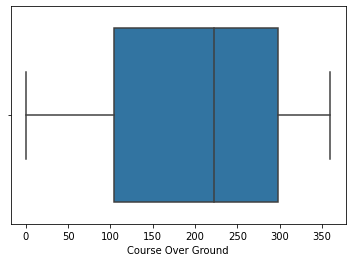

In [ ]:
sns.boxplot(x=all_data['Course Over Ground'])

In [ ]:
all_data['Course Over Ground'].describe()

count    932568.000000
mean        201.128712
std         112.539917
min           0.000000
25%         104.700000
50%         221.900000
75%         297.900000
max         360.000000
Name: Course Over Ground, dtype: float64

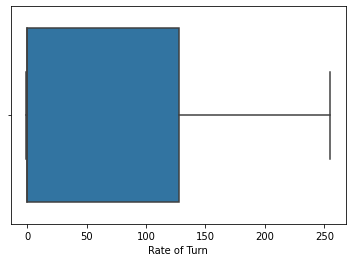

In [ ]:
sns.boxplot(x=all_data['Rate of Turn'])

In [ ]:
all_data['Rate of Turn'].describe()

count    932568.000000
mean         60.774755
std          71.590645
min          -1.000000
25%           0.000000
50%           0.000000
75%         128.000000
max         255.000000
Name: Rate of Turn, dtype: float64

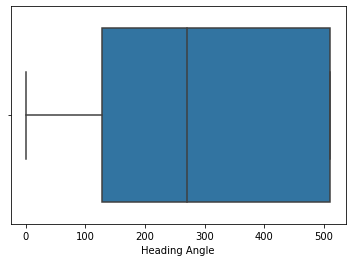

In [ ]:
sns.boxplot(x=all_data['Heading Angle'])

In [ ]:
all_data['Heading Angle'].describe()

count    932568.000000
mean        286.698587
std         171.890420
min           0.000000
25%         128.000000
50%         270.000000
75%         511.000000
max         511.000000
Name: Heading Angle, dtype: float64

In [ ]:
# Refer Tableau for Vessels in Maps

In [ ]:
# Bar graph(AIS type), Histogram(SOG)[for 1/2 MMSI]

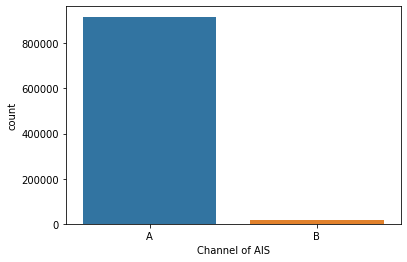

In [ ]:
# Bar graph
sns.countplot(x='Channel of AIS',data=all_data)

In [ ]:
all_data['Channel of AIS'].value_counts()

A    917714
B     14854
Name: Channel of AIS, dtype: int64

In [ ]:
# Histogram Line
MMSIvalue=all_data[all_data['MMSI Number']==566241000]
print(MMSIvalue.shape)

(315, 10)


In [ ]:
print(MMSIvalue['Speed Over Ground'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
310    0.0
311    0.0
312    0.5
313    0.9
314    0.9
Name: Speed Over Ground, Length: 315, dtype: float64


Text(0.5, 1.0, 'Speed Over Ground Record of 566241000 (MMSI Number) Vessel')

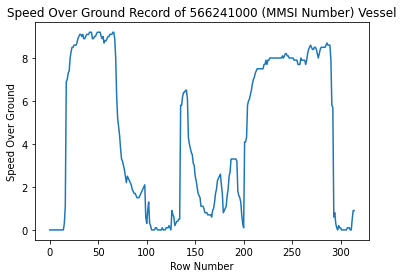

In [ ]:
plt.plot(MMSIvalue['Speed Over Ground'])
plt.xlabel('Row Number')
plt.ylabel('Speed Over Ground')
plt.title('Speed Over Ground Record of 566241000 (MMSI Number) Vessel')

(373, 10)


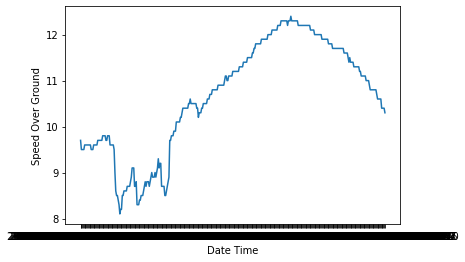

In [ ]:
# Line graph
MMSIvalue2=all_data[all_data['MMSI Number']==636018003]
print(MMSIvalue2.shape)
sns.lineplot(x=MMSIvalue2['Date Time'],y=MMSIvalue2['Speed Over Ground'])